In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [163]:
file_path = r"D:\BCA\BCA 6\project\share_prediction\NEPSE_DATA\NTC.csv"
df = pd.read_csv(file_path)
print(df.head())


   SN       Date  Txns MaxPrice MinPrice Close   Volume        Turnover  \
0   1  7/27/2023  1752      920    900.1   902   27,445   24,883,987.20   
1   2  7/24/2023   990      939      910   932  109,645  102,002,002.20   
2   3  7/23/2023   559      930      906   922   42,672   39,221,823.60   
3   4  7/20/2023   314      924      910   912   34,496   31,517,039.30   
4   5  7/19/2023   381    929.9      912   915   32,094   29,436,994.60   

  PrevClose  Change  Change%  
0       913   -11.0    -1.20  
1       922    10.0     1.08  
2       912    10.0     1.10  
3       915    -3.0    -0.33  
4       923    -8.0    -0.87  


In [158]:
df.tail()


,SN,Date,Txns,MaxPrice,MinPrice,Close,Volume,Turnover,PrevClose,Change,Change%
2940,2941,7/4/2010,0,468,455,460,"1,100","503,900.00",0,0.0,-3.56
2941,2942,7/1/2010,0,477,459,477,500,"235,340.00",0,0.0,6.00
2942,2943,6/30/2010,0,452,450,450,500,"225,200.00",0,0.0,0.00
2943,2944,6/29/2010,0,450,445,450,"1,280","574,750.00",0,0.0,1.81
2944,2945,6/28/2010,0,450,442,442,500,"221,800.00",0,0.0,-2.00


In [159]:
df.reset_index()
df.head()

,SN,Date,Txns,MaxPrice,MinPrice,Close,Volume,Turnover,PrevClose,Change,Change%
0,1,7/27/2023,1752,920,900.1,902,"27,445","24,883,987.20",913,-11.0,-1.20
1,2,7/24/2023,990,939,910,932,"109,645","102,002,002.20",922,10.0,1.08
2,3,7/23/2023,559,930,906,922,"42,672","39,221,823.60",912,10.0,1.10
3,4,7/20/2023,314,924,910,912,"34,496","31,517,039.30",915,-3.0,-0.33
4,5,7/19/2023,381,929.9,912,915,"32,094","29,436,994.60",923,-8.0,-0.87


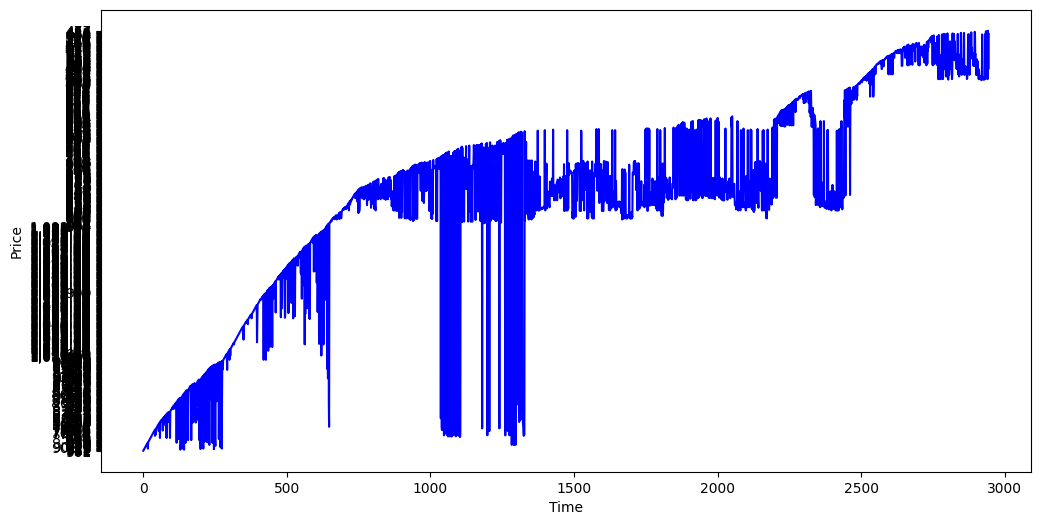

In [168]:
plt.figure(figsize= (12,6))
plt.plot(df.Close,'b')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()


In [30]:
df


,SN,Date,Txns,MaxPrice,MinPrice,Close,Volume,Turnover,PrevClose,Change,Change%
0,1,7/27/2023,1752,920,900.1,902,"27,445","24,883,987.20",913,-11.0,-1.20
1,2,7/24/2023,990,939,910,932,"109,645","102,002,002.20",922,10.0,1.08
2,3,7/23/2023,559,930,906,922,"42,672","39,221,823.60",912,10.0,1.10
3,4,7/20/2023,314,924,910,912,"34,496","31,517,039.30",915,-3.0,-0.33
4,5,7/19/2023,381,929.9,912,915,"32,094","29,436,994.60",923,-8.0,-0.87
...,...,...,...,...,...,...,...,...,...,...,...
2940,2941,7/4/2010,0,468,455,460,"1,100","503,900.00",0,0.0,-3.56
2941,2942,7/1/2010,0,477,459,477,500,"235,340.00",0,0.0,6.00
2942,2943,6/30/2010,0,452,450,450,500,"225,200.00",0,0.0,0.00
2943,2944,6/29/2010,0,450,445,450,"1,280","574,750.00",0,0.0,1.81


In [38]:
df['Close'] = df['Close'].str.replace(',', '').astype(float)
ma100 = df['Close'].rolling(100).mean()
ma100
 

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
2940    450.94
2941    451.10
2942    451.10
2943    451.15
2944    451.08
Name: Close, Length: 2945, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


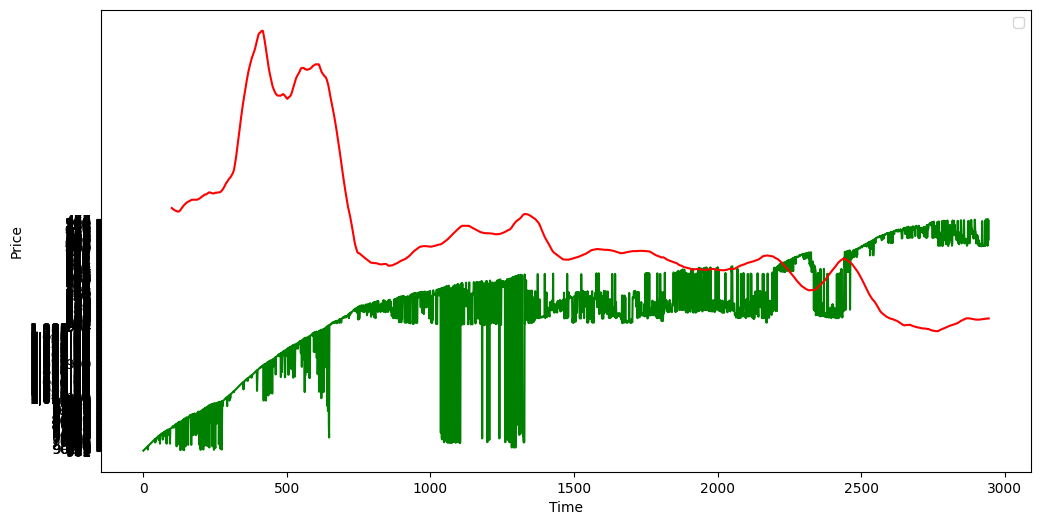

In [174]:
plt.figure(figsize= (12,6))
plt.plot(df.Close,'g')
plt.plot(ma100,'r')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
         

In [45]:
ma200 = df['Close'].rolling(200).mean()


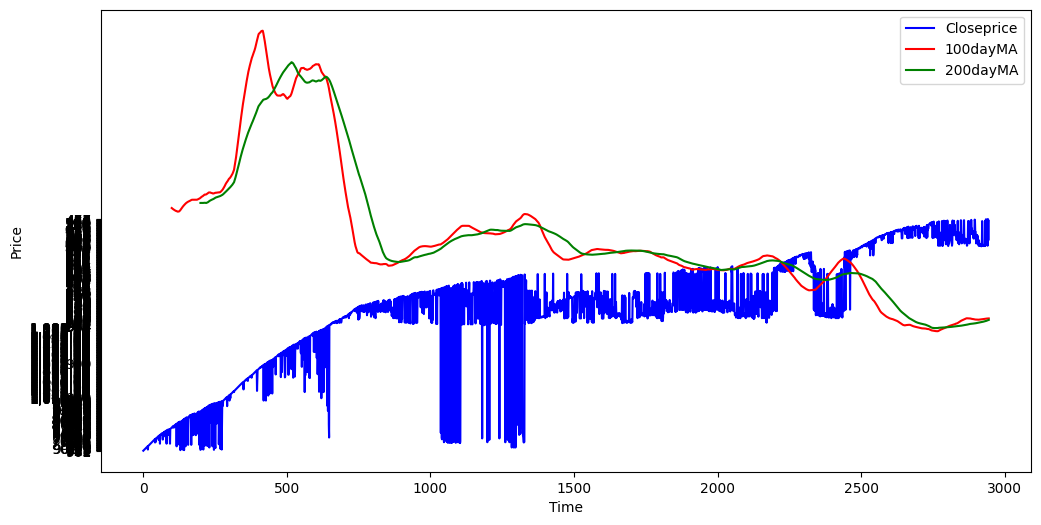

In [166]:
plt.figure(figsize= (12,6))
plt.plot(df.Close,'b', label = "Closeprice")
plt.plot(ma100,'r' ,label= '100dayMA')
plt.plot(ma200,'g' , label= '200dayMA')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
         

In [172]:
df.shape

(2945, 11)

In [173]:
  # SPliting Data into  Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2061, 1)
(884, 1)


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [65]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)
print(data_training_array.shape)


[[0.28408163]
 [0.30857143]
 [0.30040816]
 ...
 [0.04979592]
 [0.04571429]
 [0.07836735]]
(2061, 1)


In [67]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train),np.array(y_train)


In [73]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [75]:
model = Sequential()
model.add(LSTM(units =50,activation ='relu', return_sequences = True,
 input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60,activation ='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80,activation ='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120,activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units =1 ))

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [79]:
model.compile(optimizer = 'adam', loss =  'mean_squared_error')
model.fit(x_train, y_train, epochs = 50 )

Epoch 1/50
62/62 [==============================] - 18s 197ms/step - loss: 0.0172
Epoch 2/50
62/62 [==============================] - 11s 174ms/step - loss: 0.0059
Epoch 3/50
62/62 [==============================] - 10s 156ms/step - loss: 0.0057
Epoch 4/50
62/62 [==============================] - 11s 171ms/step - loss: 0.0047
Epoch 5/50
62/62 [==============================] - 10s 162ms/step - loss: 0.0042
Epoch 6/50
62/62 [==============================] - 11s 173ms/step - loss: 0.0036
Epoch 7/50
62/62 [==============================] - 9s 151ms/step - loss: 0.0036
Epoch 8/50
62/62 [==============================] - 10s 165ms/step - loss: 0.0033
Epoch 9/50
62/62 [==============================] - 8s 122ms/step - loss: 0.0030
Epoch 10/50
62/62 [==============================] - 8s 127ms/step - loss: 0.0050
Epoch 11/50
62/62 [==============================] - 8s 131ms/step - loss: 0.0035
Epoch 12/50
62/62 [==============================] - 10s 154ms/step - loss: 0.0034
Epoch 13/50
62/62

In [82]:
# model.save("keras_model.h5")
model.save('my_Stock.keras')

In [108]:
past_100_days = data_training.tail(100)

In [110]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [112]:
input_data  = scaler.fit_transform(final_df)

In [115]:
input_data.shape

(984, 1)

In [118]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
     x_test.append(input_data[i-100:i])
     y_test.append(input_data[i,0])

In [120]:
x_test , y_test  = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(884, 100, 1)
(884,)


In [121]:
# Making Prediction

y_predicted = model.predict(x_test)

28/28 [==============================] - 4s 116ms/step


In [175]:
y_predicted.shape
# print(y_predicted)

(884, 1)

In [126]:
# y_test
#y_predicted

In [128]:
scaler.scale_

array([0.00298507])

In [146]:
scale_factor = 1/0.00298507
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor



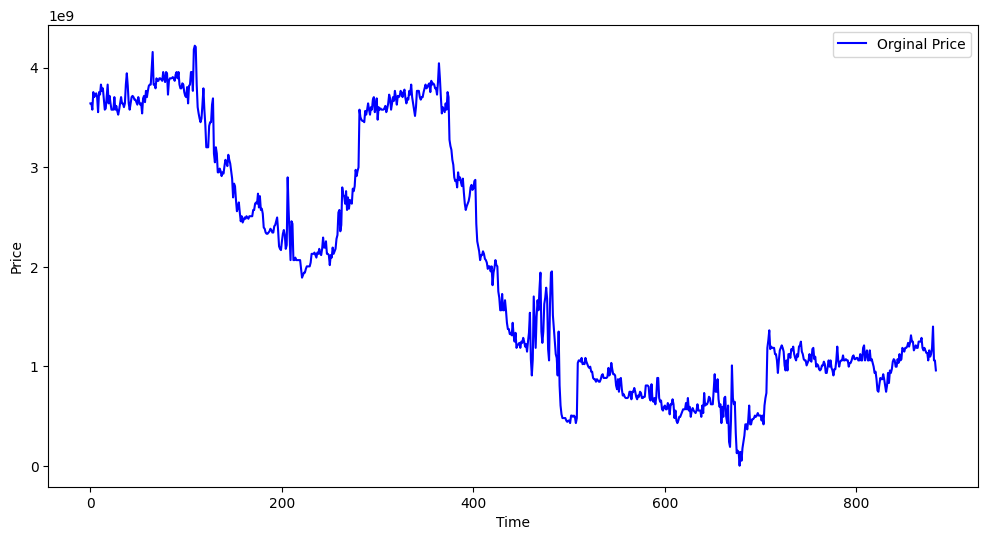

In [148]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label= "Orginal Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

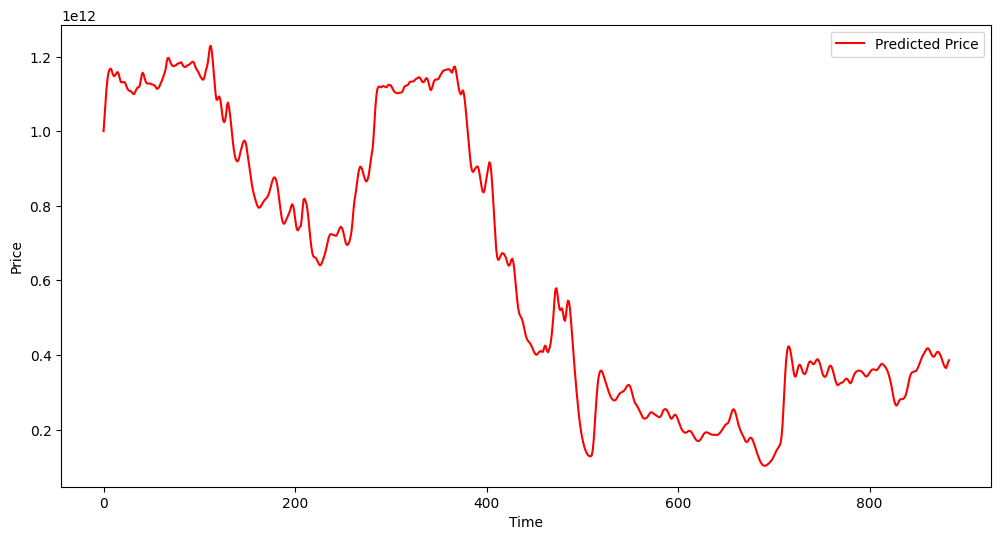

In [149]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

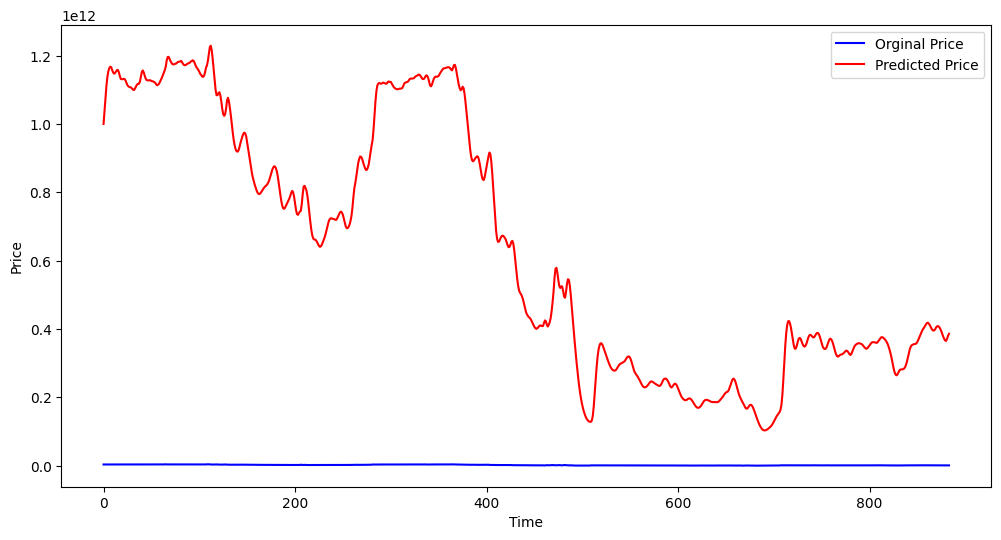

In [150]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label= "Orginal Price")
plt.plot(y_predicted, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()